/home/ak/anaconda3/envs/tickData/lib/python3.6/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


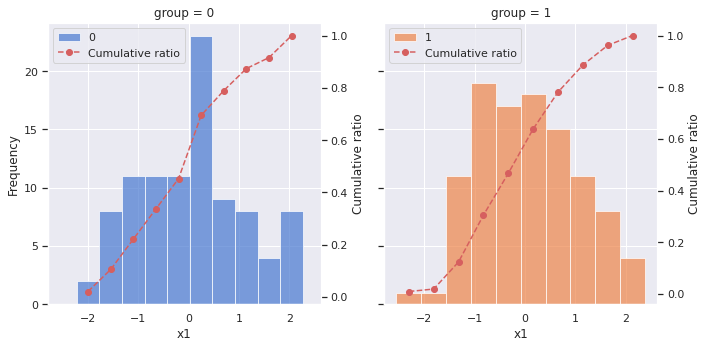

In [7]:
"""Example to show how to plot histogram with accumulate ratio.

Plot multiple histogram using seaborn.FacetGrid()
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="darkgrid", palette="muted", color_codes=True)

# Genarate toy data
np.random.seed(0)

size = 200
x1 = np.random.normal(size=size)
group = np.random.choice((0, 1), size=size)
df = pd.DataFrame({'x1': x1, 'group': group})

# Plot multiple histogram using seaborn.FacetGrid()
g = sns.FacetGrid(data=df, col='group', hue='group', size=5)
g = g.map(plt.hist, 'x1', alpha=0.7, label='Frequency')



# Add cumulative ratio to each ax in gridobject
for ax in g.axes.ravel():

    # Get patches in ax
    patches = ax.patches

    # Calc values plot with secondary axis

    # Calc x value (position to plot)
    bins_part= [patch.get_xy()[0] + patch.get_width() for patch in patches]
    bins = [patches[0].get_xy()[0]] + bins_part
    x2 = np.convolve(bins, np.ones(2) / 2, mode="same")[1:]

    # Calc cumlative ratio
    n = [patch.get_height() for patch in patches]
    y2 = np.add.accumulate(n) / sum(n)

    # Plot secondary value
    ax2 = ax.twinx()
    lines = ax2.plot(x2, y2, ls='--', marker='o', color='r',
                     label='Cumulative ratio')
    ax2.grid(visible=False)

    # Add 1st y label
    ax.set_ylabel('Frequency')

    # Add 2nd y label
    ax2.set_ylabel('Cumulative ratio')

    # Add Legend
    plt.legend(handles=[patches[0], lines[0]])


plt.savefig('fig_facetgrid.png', dpi=150)

plt.tight_layout()
plt.show()


In [9]:
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])
df

,position,step,walk
0,0,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,0,4,0
...,...,...,...
95,0,0,19
96,-1,1,19
97,0,2,19
98,1,3,19


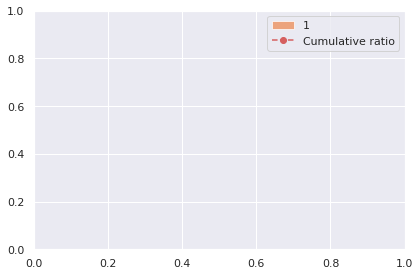